In [2]:
#@title Code - Load dependencies

#general
import io

# data
import numpy as np
import pandas as pd

# machine learning
import keras

# data visualization
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

In [3]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# File path in Google Drive
fueltrain_dataset = '/content/drive/My Drive/Colab Notebooks/fuel_train.csv'

# Read the CSV into a DataFrame
df = pd.read_csv(fueltrain_dataset)

# Display first few rows of the DataFrame
df.head()


Mounted at /content/drive


,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,VOLKSWAGEN,GTI,COMPACT,2.0,4,M5,X,11.2,228
1,2000,DODGE,DAKOTA 4X4,PICKUP TRUCK - STANDARD,4.7,8,M5,X,18.8,382
2,2000,GMC,C1500 SIERRA,PICKUP TRUCK - STANDARD,4.8,8,M5,X,18.9,373
3,2000,FORD,F150 4X4,PICKUP TRUCK - STANDARD,4.6,8,A4,X,18.5,380
4,2000,FORD,F150 4X4,PICKUP TRUCK - STANDARD,4.2,6,A4,X,17.3,359


In [4]:
print(df.columns)


Index(['Year', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'COEMISSIONS '],
      dtype='object')


In [5]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Now select the columns
training_df = df[['VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS', 'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'COEMISSIONS']]


In [6]:
#@title Code - Read dataset

# Updates dataframe to use specific columns.
training_df =df[['VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',	'TRANSMISSION',	'FUEL',	'FUEL CONSUMPTION',	'COEMISSIONS']]

print('Read dataset completed successfully.')
print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.head(200)

Read dataset completed successfully.
Total number of rows: 511




,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,COMPACT,2.0,4,M5,X,11.2,228
1,PICKUP TRUCK - STANDARD,4.7,8,M5,X,18.8,382
2,PICKUP TRUCK - STANDARD,4.8,8,M5,X,18.9,373
3,PICKUP TRUCK - STANDARD,4.6,8,A4,X,18.5,380
4,PICKUP TRUCK - STANDARD,4.2,6,A4,X,17.3,359
...,...,...,...,...,...,...,...
195,COMPACT,2.8,6,M5,Z,14.3,288
196,MID-SIZE,4.4,8,A5,Z,15.4,308
197,STATION WAGON - MID-SIZE,2.8,6,M5,Z,13.4,262
198,SUBCOMPACT,2.0,4,M5,X,11.2,230


In [7]:
#@title Code - View dataset statistics

print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.describe(include='all')

Total number of rows: 511




,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
count,511,511.000000,511.000000,511,511,511.000000,511.000000
unique,14,NaN,NaN,7,5,NaN,NaN
top,COMPACT,NaN,NaN,A4,X,NaN,NaN
freq,87,NaN,NaN,256,372,NaN,NaN
mean,NaN,3.206654,5.726027,NaN,NaN,14.532485,293.213307
std,NaN,1.194413,1.520864,NaN,NaN,3.164069,63.158713
min,NaN,1.000000,3.000000,NaN,NaN,4.900000,104.000000
25%,NaN,2.200000,4.000000,NaN,NaN,12.200000,251.000000
50%,NaN,3.000000,6.000000,NaN,NaN,14.200000,283.000000
75%,NaN,4.000000,6.000000,NaN,NaN,16.500000,336.000000


In [8]:
#@title Code - View correlation matrix
training_df.corr(numeric_only = True)

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
ENGINE SIZE,1.000000,0.899827,0.867575,0.856685
CYLINDERS,0.899827,1.000000,0.816789,0.791469
FUEL CONSUMPTION,0.867575,0.816789,1.000000,0.980528
COEMISSIONS,0.856685,0.791469,0.980528,1.000000


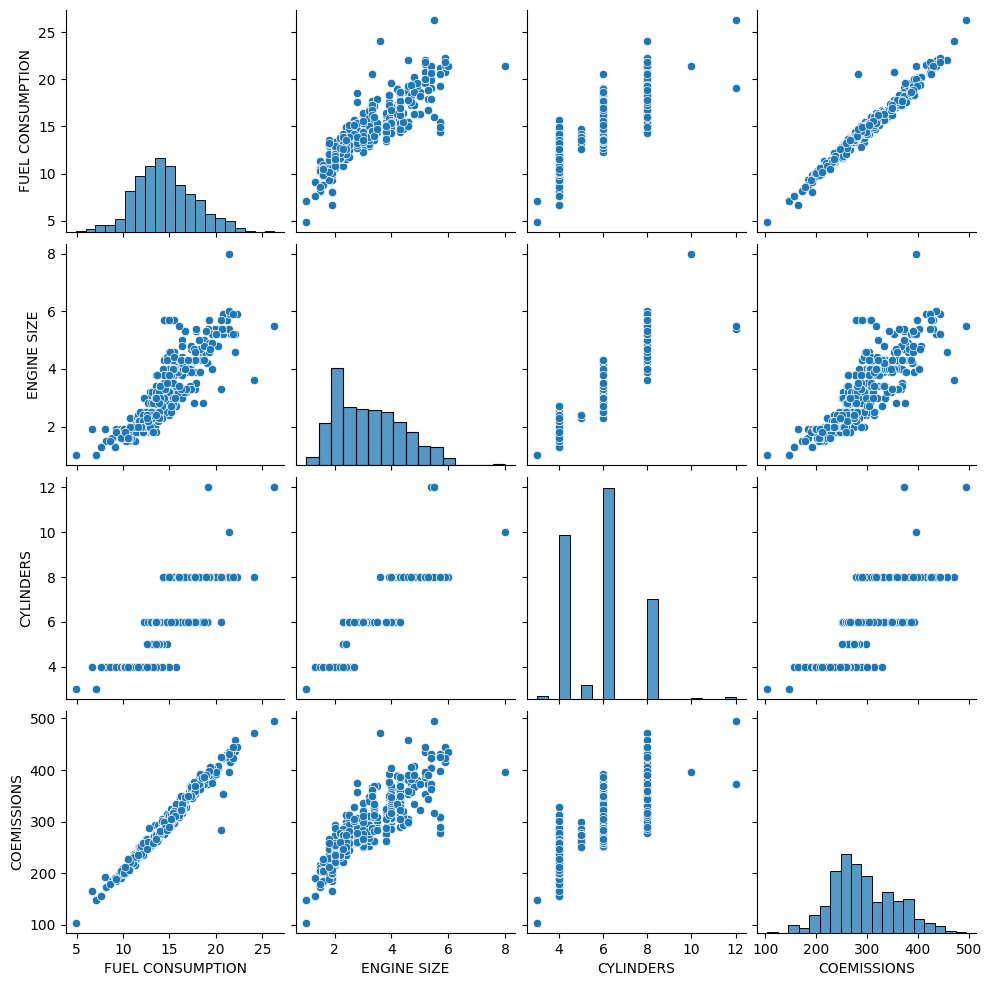

In [9]:
#@title Code - View pairplot
sns.pairplot(training_df, x_vars=["FUEL CONSUMPTION", "ENGINE SIZE", "CYLINDERS","COEMISSIONS"], y_vars=["FUEL CONSUMPTION", "ENGINE SIZE", "CYLINDERS", "COEMISSIONS"])

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

def loss_function(m,b,points):
  total_error = 0
  for i in range(0, len(points)):
    x = points.iloc[i].COEMISSIONS
    y = points.iloc[i]['FUEL CONSUMPTION']
    total_error += (y - (m * x + b)) ** 2
  total_error / float(len(points))
#
def gradient_descent(m,b,points,learning_rate):
  m_gradient = 0
  b_gradient = 0
  N = len(points)

  for i in range(N):
    x = points.iloc[i].COEMISSIONS
    y = points.iloc[i]['FUEL CONSUMPTION']

    m_gradient += -(2/N) * x * (y - (m * x + b))
    b_gradient += -(2/N) * (y - (m * x + b))

  new_m = m - (learning_rate * m_gradient)
  new_b = b - (learning_rate * b_gradient)

  return [new_m, new_b]




Epoch: 0
Epoch: 50
Epoch: 100
Epoch: 150
Epoch: 200
Epoch: 250
0.04957454439267843 -0.009580150721000007
None


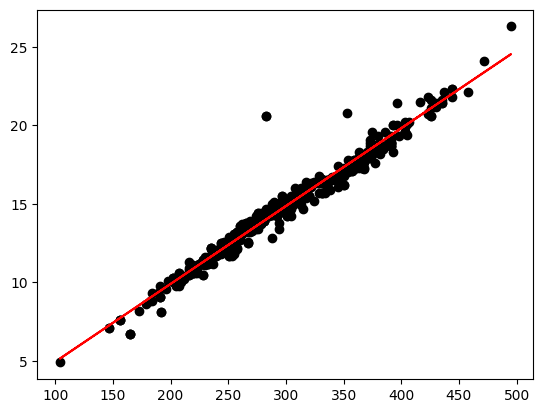

In [45]:
m= 3
b= 0
learning_rate=0.00001
epochs=300
for i in range(epochs):
  if i%50 ==0:
    print(f"Epoch: {i}")

  m,b = gradient_descent(m, b, training_df, learning_rate)

print(m,b)
print(loss_function(m,b,training_df))

plt.scatter( training_df['COEMISSIONS'],training_df['FUEL CONSUMPTION'], color='black')
plt.plot(training_df['COEMISSIONS'], m*training_df['COEMISSIONS'] + b, color='red')
plt.show()